In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

random_state = 1

# do all the same preprocessing below!

In [2]:
skincare = pd.read_csv('skincare_prepared.csv', sep=",")
skincare

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100ml
1,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10ml
2,Aesop Parsley Seed Anti-Oxidant Eye Serum 15ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ...",57.0,15ml
3,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200ml
4,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500ml
...,...,...,...,...,...,...,...
1130,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,15ml
1131,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30ml
1132,Zelens Z Hyaluron Hyaluronic Acid Complex Seru...,Zelens,https://www.lookfantastic.com/zelens-z-hyaluro...,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze...",55.0,30ml
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50ml


In [3]:
skincare['contents'] = skincare['contents'].str.replace('ml', '')
skincare['contents'] = skincare['contents'].str.replace('g', '')
skincare
# Big assumption - treat ml and g as the same measurement because the viscosity for each product is unknown

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100
1,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10
2,Aesop Parsley Seed Anti-Oxidant Eye Serum 15ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ...",57.0,15
3,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200
4,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500
...,...,...,...,...,...,...,...
1130,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,15
1131,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30
1132,Zelens Z Hyaluron Hyaluronic Acid Complex Seru...,Zelens,https://www.lookfantastic.com/zelens-z-hyaluro...,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze...",55.0,30
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50


In [4]:
skincare['contents'] = skincare['contents'].astype(float)
skincare['price'] = skincare['price'].astype(float)
skincare

,product_name,brand,product_url,product_type,ingredients,price,contents
0,Acorelle Pure Harvest Body Perfume - 100ml,Acorelle,https://www.lookfantastic.com/acorelle-pure-ha...,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ...",10.0,100.0
1,Aesop Parsley Seed Anti-Oxidant Eye Cream 10ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm...",63.0,10.0
2,Aesop Parsley Seed Anti-Oxidant Eye Serum 15ml,Aesop,https://www.lookfantastic.com/aesop-parsley-se...,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ...",57.0,15.0
3,Aesop Amazing Face Cleanser 200ml,Aesop,https://www.lookfantastic.com/aesop-amazing-fa...,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce...",35.0,200.0
4,Aesop Animal Body Wash 500ml,Aesop,https://www.lookfantastic.com/aesop-animal-bod...,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen...",27.0,500.0
...,...,...,...,...,...,...,...
1130,Zelens Triple Action Advanced Eye Cream,Zelens,https://www.lookfantastic.com/zelens-triple-ac...,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,...",80.0,15.0
1131,Zelens Youth Concentrate Supreme Age-Defying S...,Zelens,https://www.lookfantastic.com/zelens-youth-con...,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy...",160.0,30.0
1132,Zelens Z Hyaluron Hyaluronic Acid Complex Seru...,Zelens,https://www.lookfantastic.com/zelens-z-hyaluro...,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze...",55.0,30.0
1133,Zelens PROVITAMIN D Fortifying Facial Mist 50ml,Zelens,https://www.lookfantastic.com/zelens-provitami...,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce...",55.0,50.0


In [5]:
skincare['product_type'].unique() 

array(['Mist', 'Eye Care', 'Cleanser', 'Body Wash', 'Mask', 'Bath Salts',
       'Peel', 'Toner', 'Balm', 'Moisturiser', 'Bath Oil', 'Oil', 'Serum',
       'Exfoliator'], dtype=object)

In [6]:
print(skincare['price'].describe())

count    1135.000000
mean       23.963419
std        21.713618
min         1.950000
25%         9.950000
50%        18.900000
75%        31.250000
max       230.000000
Name: price, dtype: float64


In [7]:
print(type(skincare['price']))

<class 'pandas.core.series.Series'>


In [8]:
# define a function that converts price to a class
def price_to_class(x):
    if x <= 9.950000:
        x = 0
    elif (x > 9.950000) and (x <= 18.900000):
        x = 1
    elif (x > 18.900000) and (x <= 31.250000):
        x = 2
    elif x > 31.250000: 
        x = 3
    return x

In [9]:
skincare['price'] = skincare["price"].apply(price_to_class)
# convert the price to 1 for 'expensive' if over the 50 percentile, and to 0 for 'cheap' if under the 50 percentile
skincare['price'].value_counts()

0    286
3    284
2    283
1    282
Name: price, dtype: int64

In [10]:
y = np.array(skincare['price'])
y.shape
# prepare labels
y
# labels now multiclass

array([1, 3, 3, ..., 3, 3, 3], dtype=int64)

In [11]:
def tokenizer(x) -> list: 
    x = x.replace('(', '')
    x = x.replace(')', '')
    x = x.replace("\xa0", " ")
    x = x.replace(".", ",")
    x = x.replace(" & ", ", ")
    x = re.split(', ', x)
    return x
# define custom tokenizer

In [12]:
ohe = OneHotEncoder()
vect = CountVectorizer(tokenizer=lambda x: tokenizer(x))
scaler = StandardScaler()
# instantiate transformers

In [13]:
X = skincare[['brand', 'contents', 'product_type', 'ingredients']]
X
# dataset has all predictors

,brand,contents,product_type,ingredients
0,Acorelle,100.0,Mist,"Alcohol, Aqua, Glycerin, Fragrance, Limonene, ..."
1,Aesop,10.0,Eye Care,"Aloe Barbadensis Leaf Juice, Water, PEG-60 Alm..."
2,Aesop,15.0,Eye Care,"Aloe Babedensis Lead Juice, Water (Aqua), PEG ..."
3,Aesop,200.0,Cleanser,"Water, Cocamidopropyl Belaine, Sea Salt, Glyce..."
4,Aesop,500.0,Body Wash,"Water (Aqua), Sodium Laureth Sulfate, Propylen..."
...,...,...,...,...
1130,Zelens,15.0,Eye Care,"Aqua (Water), Dimethicone, Cyclopentasiloxane,..."
1131,Zelens,30.0,Serum,"Water (Aqua), Caprylic/Capric Triglyceride, Hy..."
1132,Zelens,30.0,Serum,"Aqua (Water), Glycerin, Propanediol, Hydrolyze..."
1133,Zelens,50.0,Mist,"Aqua (Water), Propanediol, Glycerin, Polyglyce..."


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, random_state=random_state, stratify=y)
# prepare train and test datasets

In [15]:
X_train

,brand,contents,product_type,ingredients
523,Holika Holika,150.0,Serum,"Water, Ethanol, Bis-PEG-18 Methyl Ether Dimeth..."
824,NIP+FAB,23.0,Mask,"Aqua (Water), Glycerin, Cocamidopropyl Betaine..."
598,La Roche-Posay,200.0,Cleanser,"Water, Decyl Glucoside, Sodium Laureth Sulfate..."
1074,The Organic Pharmacy,30.0,Serum,"Hamamelis Virginiana Water, Aqua (Water), Citr..."
271,Clinique,7.0,Balm,"Petrolatum, Polybutene, Polydecene, Bis-Diglyc..."
...,...,...,...,...
101,Balance Me,15.0,Eye Care,"Aqua (Water), Glycerin (Vegetable), Hamamelis ..."
1014,Skin Doctors,50.0,Moisturiser,"Aqua(Water), Butylene Glycol, Ethylhexyl, Meth..."
1051,The INKEY List,30.0,Moisturiser,"Aqua (Water/ Eau), Squalane, Glycerin, Propane..."
41,APIVITA,16.0,Mask,"Aqua (Water), Caprylic/Capric Triglyceride, Gl..."


# w/ BRAND - MULTICLASS - LOGISTIC REGRESSION

In [16]:
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"),
    (vect, 'ingredients'),
    (scaler, ["contents"]),
    remainder="passthrough")
# prepare column transformers

## One-vs-rest classification

In [17]:
from sklearn.linear_model import LogisticRegression

lr_ovr = LogisticRegression(random_state=random_state)
# logistic regression does one-vs-rest classification naturally
lrovr_pipe = make_pipeline(ct, lr_ovr)
lrovr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'brand'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'ingredients'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['con

In [18]:
lr_ovr.intercept_.shape
# 4 intercepts for 4 classifiers

(4,)

In [19]:
lr_ovr.coef_.shape

(4, 3795)

In [20]:
lrovr_predictions = lrovr_pipe.predict(X_test)

In [21]:
accuracy_score(y_test, lrovr_predictions)
# get initial terrible accuracy score - hopefully it gets better

0.5484581497797357

In [22]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
tols = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = {'logisticregression__C': Cs, 'logisticregression__solver':solvers, 'logisticregression__tol':tols}
lrovr_pipe = make_pipeline(ct, lr_ovr)
lrovr_gs = RandomizedSearchCV(estimator=lrovr_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
lrovr_gs = lrovr_gs.fit(X_train, y_train)
lrovr_gs.best_params_

C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the

C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the

{'logisticregression__tol': 0.1,
 'logisticregression__solver': 'newton-cg',
 'logisticregression__C': 10}

In [23]:
best_lrovr = lrovr_gs.best_estimator_   # refitting done automatically
best_lrovr.score(X_test, y_test)
# get the optimal accuracy score, still terrible

0.5550660792951542

In [24]:
scores = cross_val_score(estimator=best_lrovr, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.55072464 0.45588235 0.60294118 0.52941176 0.48529412 0.61764706
 0.55882353 0.45588235 0.57352941 0.51470588]


In [25]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# sadly report terrible cross validation accuracy score

Accuracy = 0.53448423 +/- 0.05401498


# Multinomial classification

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lrmn_pipe = make_pipeline(ct, lr_mn)

lrmn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'brand'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'ingredients'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['con

In [27]:
lrmn_predictions = lrmn_pipe.predict(X_test)

In [28]:
accuracy_score(y_test, lrmn_predictions)

0.5484581497797357

In [29]:
confusion_matrix(y_test, lrmn_predictions)
# highest numbers in diagnonal=mostly correct classifications, but lots of misclassifications

array([[82, 22,  7,  3],
       [25, 57, 24,  7],
       [14, 24, 49, 26],
       [10, 12, 31, 61]], dtype=int64)

In [30]:
tols = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# define hyperparameter grid to search with
# cannot change solver though
param_grid = {'logisticregression__C': Cs, 'logisticregression__tol':tols}
lrmn_pipe = make_pipeline(ct, lr_mn)
lrmn_gs = RandomizedSearchCV(estimator=lrmn_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
lrmn_gs = lrmn_gs.fit(X_train, y_train)
lrmn_gs.best_params_

C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

{'logisticregression__tol': 1, 'logisticregression__C': 10}

In [31]:
best_lrmn = lrmn_gs.best_estimator_   # refitting done automatically
best_lrmn.score(X_test, y_test)

0.5220264317180616

In [32]:
scores = cross_val_score(estimator=best_lrmn, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.53623188 0.42647059 0.61764706 0.55882353 0.5        0.61764706
 0.54411765 0.5        0.58823529 0.55882353]


In [33]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.54479966 +/- 0.05566250


# w/ BRAND - MULTICLASS - DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=random_state, criterion='entropy')
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "brand"),
    (vect, 'ingredients'), # do not need to scale the 'contents' column
    remainder="passthrough")
dt_pipe = make_pipeline(ct, dt)
dt_pipe.fit(X_train, y_train)
dt_predictions = dt_pipe.predict(X_test)
accuracy_score(y_test, dt_predictions)

0.4801762114537445

In [35]:
confusion_matrix(y_test, dt_predictions)
# highest numbers in diagonal, but lots of misclassifications

array([[65, 21, 19,  9],
       [25, 52, 25, 11],
       [ 9, 33, 46, 25],
       [ 9, 16, 34, 55]], dtype=int64)

In [36]:
criterions = ['gini', 'entropy']
max_depths = [None, 10, 100, 1000, 10000]
param_grid = {'decisiontreeclassifier__min_samples_leaf': np.arange(1,50), 
              'decisiontreeclassifier__max_depth': max_depths, 
              'decisiontreeclassifier__criterion':criterions}
# define grid to do hyperparamter optimization with

dt_gs = RandomizedSearchCV(estimator=dt_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
dt_gs = dt_gs.fit(X_train, y_train)
print(dt_gs.best_params_)
best_dt = dt_gs.best_estimator_   # refitting done automatically
print(best_dt.score(X_test, y_test))

{'decisiontreeclassifier__min_samples_leaf': 18, 'decisiontreeclassifier__max_depth': 1000, 'decisiontreeclassifier__criterion': 'gini'}
0.43392070484581496


In [37]:
scores = cross_val_score(estimator=best_dt, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.55072464 0.39705882 0.54411765 0.45588235 0.45588235 0.52941176
 0.44117647 0.38235294 0.51470588 0.45588235]


In [38]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report cross-val-scores of optimal model

Accuracy = 0.47271952 +/- 0.05647606


# w/ BRAND - MULTICLASS - KNN

In [39]:
# redefine the column transformer to scale the contents again

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=5)
ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, "brand"),
    (scaler, ["contents"]), 
    remainder="passthrough")
knn_pipe = make_pipeline(ct, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'ingredients'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'brand'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['con

In [41]:
knn_predictions = knn_pipe.predict(X_test)
accuracy_score(y_test, knn_predictions)

0.3788546255506608

In [42]:
confusion_matrix(y_test, knn_predictions)

array([[81, 10,  2, 21],
       [49, 21,  7, 36],
       [30, 16, 17, 50],
       [27, 13, 21, 53]], dtype=int64)

In [43]:
knn_pipe = make_pipeline(ct, knn)
param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,50), 
              'kneighborsclassifier__weights':['uniform', 'distance']}
# define hyperparameter grid to do search with
knn_gs = RandomizedSearchCV(estimator=knn_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
knn_gs = knn_gs.fit(X_train, y_train)
print(knn_gs.best_params_)
best_knn = knn_gs.best_estimator_   # refitting done automatically
print(best_knn.score(X_test, y_test))

{'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 14}
0.4052863436123348


In [44]:
scores = cross_val_score(estimator=best_knn, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.50724638 0.42647059 0.42647059 0.36764706 0.42647059 0.45588235
 0.48529412 0.39705882 0.39705882 0.38235294]


In [45]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

# report cross-val-scores of optimal model

Accuracy = 0.42719523 +/- 0.04240450


# w/ BRAND - MULTICLASS - SVM

## One-vs-rest classification

In [46]:
from sklearn.multiclass import OneVsRestClassifier
# use the onevsrest classifier from multiclass

In [47]:
ovr_svm = OneVsRestClassifier(LinearSVC())
# instantiate

In [48]:
ovr_svm_pipe = make_pipeline(ct, ovr_svm)

ovr_svm_pipe.fit(X_train, y_train)

C:\Users\Dora\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'ingredients'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'brand'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['con

In [49]:
ovr_svm_predictions = ovr_svm_pipe.predict(X_test)


In [50]:
accuracy_score(y_test, ovr_svm_predictions)
# get initial predictions

0.552863436123348

In [51]:
confusion_matrix(y_test, ovr_svm_predictions)
# highest numbers are in diagonals - correct categories, but lots of misclassifications

array([[84, 23,  5,  2],
       [27, 65, 15,  6],
       [10, 29, 48, 26],
       [13, 13, 34, 54]], dtype=int64)

In [52]:
ovr_svm_pipe.get_params()

# Not able to easily do gridsearch

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder', OneHotEncoder(),
                                    ['product_type']),
                                   ('countvectorizer-1',
                                    CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                    'ingredients'),
                                   ('countvectorizer-2',
                                    CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                    'brand'),
                                   ('standardscaler', StandardScaler(),
                                    ['contents'])])),
  ('onevsrestclassifier', OneVsRestClassifier(estimator=LinearSVC()))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder', OneHotEncoder(),
     

In [53]:
scores = cross_val_score(estimator=ovr_svm_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.49275362 0.5        0.58823529 0.5        0.51470588 0.57352941
 0.54411765 0.47058824 0.54411765 0.48529412]


In [54]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report cross val score of the classifier

Accuracy = 0.52133419 +/- 0.03726042


## One-vs-one classification

In [55]:
from sklearn.multiclass import OneVsOneClassifier
# same thing, but with onevsoneclassifier

ovo_svm = OneVsOneClassifier(LinearSVC())

ovo_svm_pipe = make_pipeline(ct, ovo_svm)

ovo_svm_pipe.fit(X_train, y_train)

ovo_svm_predictions = ovo_svm_pipe.predict(X_test)

In [56]:
accuracy_score(y_test, ovr_svm_predictions)

0.552863436123348

In [57]:
scores = cross_val_score(estimator=ovo_svm_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.49275362 0.51470588 0.58823529 0.52941176 0.48529412 0.61764706
 0.52941176 0.54411765 0.52941176 0.52941176]


In [58]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))
# report one-vs-one scores

Accuracy = 0.53604007 +/- 0.03811698


# w/ BRAND - MULTICLASS - VOTING CLASSIFIER

In [59]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(tol=1e-05, solver='saga', C=10, random_state=random_state)
dt = DecisionTreeClassifier(min_samples_leaf=2, max_depth= 10000, criterion="gini", random_state=random_state)
ovo_svm = OneVsOneClassifier(LinearSVC())
# use best models from before

classifiers = [("Logistic Regression", lr),
              ("Decision Tree", dt),
              ("Support Vector Classifier", ovo_svm)]
vc = VotingClassifier(estimators = classifiers)

# make and fit pipeline
vc_pipe = make_pipeline(ct, vc)

In [60]:
vc_pipe.fit(X_train, y_train)
vc_predictions = vc_pipe.predict(X_test)
accuracy_score(y_test, vc_predictions)

C:\Users\Dora\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Dora\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5440528634361234

In [61]:
scores = cross_val_score(estimator=vc_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)

[0.47826087 0.5        0.60294118 0.52941176 0.52941176 0.61764706
 0.55882353 0.55882353 0.52941176 0.52941176]


In [62]:
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

Accuracy = 0.54341432 +/- 0.04054984


# w/ BRAND - MULTICLASS - BAGGING CLASSIFIER

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(min_samples_leaf=2, max_depth= 10000, criterion="gini", random_state=random_state)
# use decision tree classifier again with best hyperparameters for decision tree

bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = 300, n_jobs = -1)

ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, "brand"),
    remainder="passthrough")

bc_pipe = make_pipeline(ct, bc)
bc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['product_type']),
                                                 ('countvectorizer-1',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'ingredients'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(tokenizer=<function <lambda> at 0x00000196FAFFF160>),
                                                  'brand')])),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10000,
                                                            

In [64]:
bc_predictions = bc_pipe.predict(X_test)
accuracy_score(y_test, bc_predictions)
# get initial accuracy score

0.566079295154185

In [65]:
accs = []
n_estimators_range = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for n_estimators in n_estimators_range: 
    bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = n_estimators, n_jobs = -1)
    ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, 'brand'),
    (vect, "ingredients"), 
    remainder="passthrough")
    bc_pipe = make_pipeline(ct, bc)
    bc_pipe.fit(X_train, y_train)
    bc_pred = bc_pipe.predict(X_test)
    acc = accuracy_score(y_test, bc_pred)
    accs.append(acc)
    print(n_estimators, "Done with this number of estimators")
# test all the number of estimators

100 Done with this number of estimators
200 Done with this number of estimators
300 Done with this number of estimators
400 Done with this number of estimators
500 Done with this number of estimators
600 Done with this number of estimators
700 Done with this number of estimators
800 Done with this number of estimators
900 Done with this number of estimators
1000 Done with this number of estimators


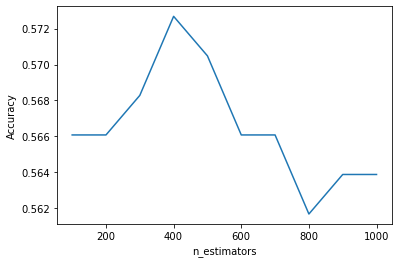

In [66]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_estimators_range, accs)
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.show()

In [71]:
bc = BaggingClassifier(base_estimator = dt, random_state=random_state, n_estimators = 400, n_jobs = -1)
# When tested, 400 does better, switch to this number

ct = make_column_transformer(
    (ohe, ["product_type"]),
    (vect, "ingredients"),
    (vect, 'brand'),
    remainder="passthrough")
bc_pipe = make_pipeline(ct, bc)

bc_pipe.fit(X_train, y_train)
bc_pred = bc_pipe.predict(X_test)
print(accuracy_score(y_test, bc_pred))


scores = cross_val_score(estimator=bc_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

0.5748898678414097
[0.60869565 0.54411765 0.63235294 0.51470588 0.47058824 0.58823529
 0.48529412 0.52941176 0.55882353 0.54411765]
Accuracy = 0.54763427 +/- 0.04893143


# w/ BRAND - MULTICLASS - RANDOM FORESTS

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = random_state)
# instantiate randomforestclassifier


rf_pipe = make_pipeline(ct, rf)
rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)
accuracy_score(y_test, rf_pred)

0.5748898678414097

In [69]:
criterions = ['gini', 'entropy']
max_depths = [None, 10, 100, 1000, 10000]
param_grid = {'randomforestclassifier__min_samples_leaf': np.arange(1,50), 
              'randomforestclassifier__max_depth': max_depths, 
              'randomforestclassifier__criterion':criterions}

# define grid to optimize hyperparameters
rf = RandomForestClassifier(n_estimators = 1000, random_state = random_state)
rf_pipe = make_pipeline(ct, rf)

rf_gs = RandomizedSearchCV(estimator=rf_pipe, param_distributions=param_grid, random_state=random_state, scoring='accuracy', cv=10, refit=True)
rf_gs = rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
best_rf = rf_gs.best_estimator_   # refitting done automatically
print(best_rf.score(X_test, y_test))

{'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 10000, 'randomforestclassifier__criterion': 'gini'}
0.5638766519823789


In [70]:
scores = cross_val_score(estimator=best_rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(scores)
print('Accuracy = {:.8f} +/- {:.8f}'.format(np.mean(scores), np.std(scores)))

# report cross validation scores after hyperparameter tuning

[0.62318841 0.51470588 0.60294118 0.57352941 0.5        0.61764706
 0.48529412 0.52941176 0.57352941 0.58823529]
Accuracy = 0.56084825 +/- 0.04741750
